In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

## load and parse XML
tree = ET.parse('/Users/joshuawb/Downloads/apple_health_export/export.xml')
root = tree.getroot()

# Extract all records
records = []
for record in root.findall('Record'):
    records.append(record.attrib)

df = pd.DataFrame(records)


In [4]:
#df.describe()
df['sourceName'].value_counts()

## Subset to data from Apple Watches only
df_watches = df[df['sourceName'].str.contains('Watch', na=False)]


In [ ]:
## Let's understand the different types of data collected by the Apple Watch
df_watches['type'].value_counts()

type
HKQuantityTypeIdentifierActiveEnergyBurned                    437959
HKQuantityTypeIdentifierHeartRate                             386924
HKQuantityTypeIdentifierBasalEnergyBurned                     385566
HKQuantityTypeIdentifierPhysicalEffort                        325630
HKQuantityTypeIdentifierDistanceWalkingRunning                182545
HKQuantityTypeIdentifierStepCount                              97894
HKQuantityTypeIdentifierAppleExerciseTime                      61704
HKQuantityTypeIdentifierAppleStandTime                         48435
HKQuantityTypeIdentifierEnvironmentalAudioExposure             29674
HKQuantityTypeIdentifierRunningPower                           23541
HKQuantityTypeIdentifierRunningSpeed                           23533
HKQuantityTypeIdentifierTimeInDaylight                         22355
HKCategoryTypeIdentifierAppleStandHour                         14811
HKQuantityTypeIdentifierRespiratoryRate                        12355
HKQuantityTypeIdentifierRunni

In [10]:
## We should probably create different datasets based on the type of data
df_watches_types = df_watches['type'].unique()  
for data_type in df_watches_types:
    subset = df_watches[df_watches['type'] == data_type]
    subset.to_csv(f'/Users/joshuawb/Downloads/apple_health_export/apple_watch_{data_type.replace(" ", "_").lower()}.csv', index=False)

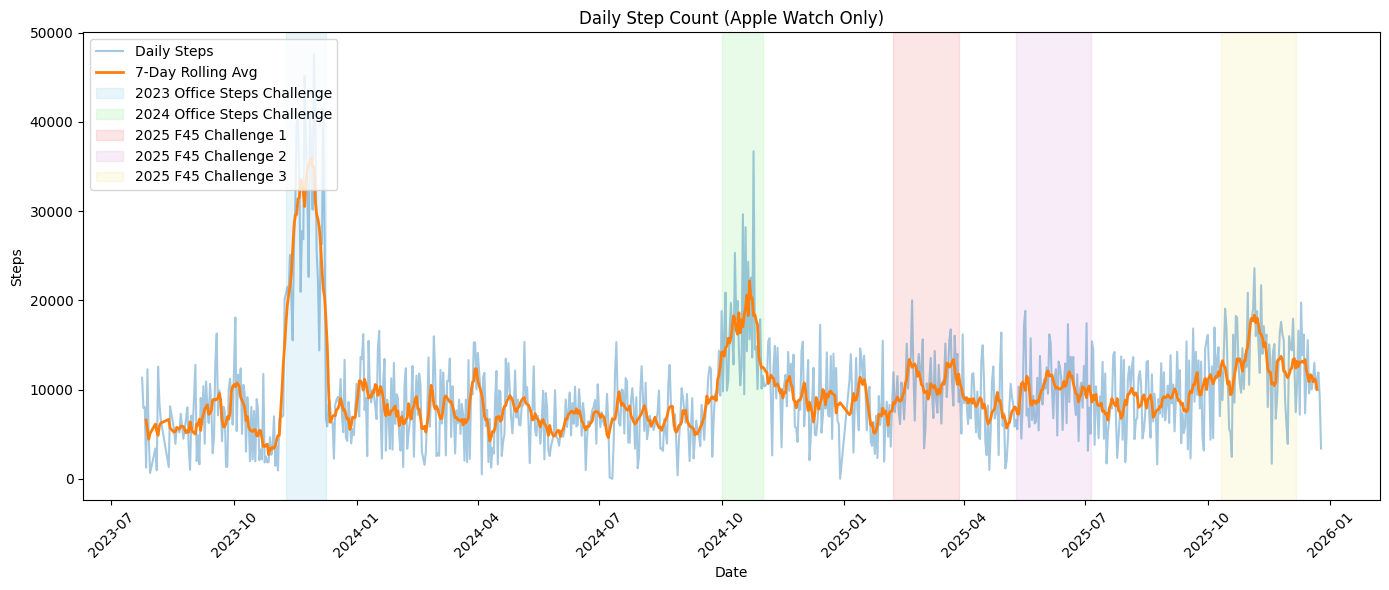

In [20]:
import matplotlib.pyplot as plt

# === Create DataFrame ===
df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifierstepcount.csv')
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['date'] = df_steps['startDate'].dt.date
daily_steps = df_steps.groupby('date')['value'].sum().reset_index()

# === Rolling Average ===
daily_steps['rolling_avg'] = daily_steps['value'].rolling(window=7, center=True).mean()

# === Plot ===
plt.figure(figsize=(14,6))
plt.plot(daily_steps['date'], daily_steps['value'], label='Daily Steps', alpha=0.4)
plt.plot(daily_steps['date'], daily_steps['rolling_avg'], label='7-Day Rolling Avg', linewidth=2)

# === Highlight Date Ranges ===
highlight_ranges = [
    ("2023-11-09", "2023-12-09", "2023 Office Steps Challenge", "skyblue"),
    ("2024-10-01", "2024-11-01", "2024 Office Steps Challenge", "lightgreen"),
    ("2025-02-07", "2025-03-28", "2025 F45 Challenge 1", "lightcoral"),
    ("2025-05-10", "2025-07-05", "2025 F45 Challenge 2", "plum"),
    ("2025-10-11", "2025-12-06", "2025 F45 Challenge 3", "khaki")
]

for start_str, end_str, label, colour in highlight_ranges:
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)
    plt.axvspan(start, end, color=colour, alpha=0.2, label=label)

# === Final Plot Settings ===
plt.title('Daily Step Count (Apple Watch Only)')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

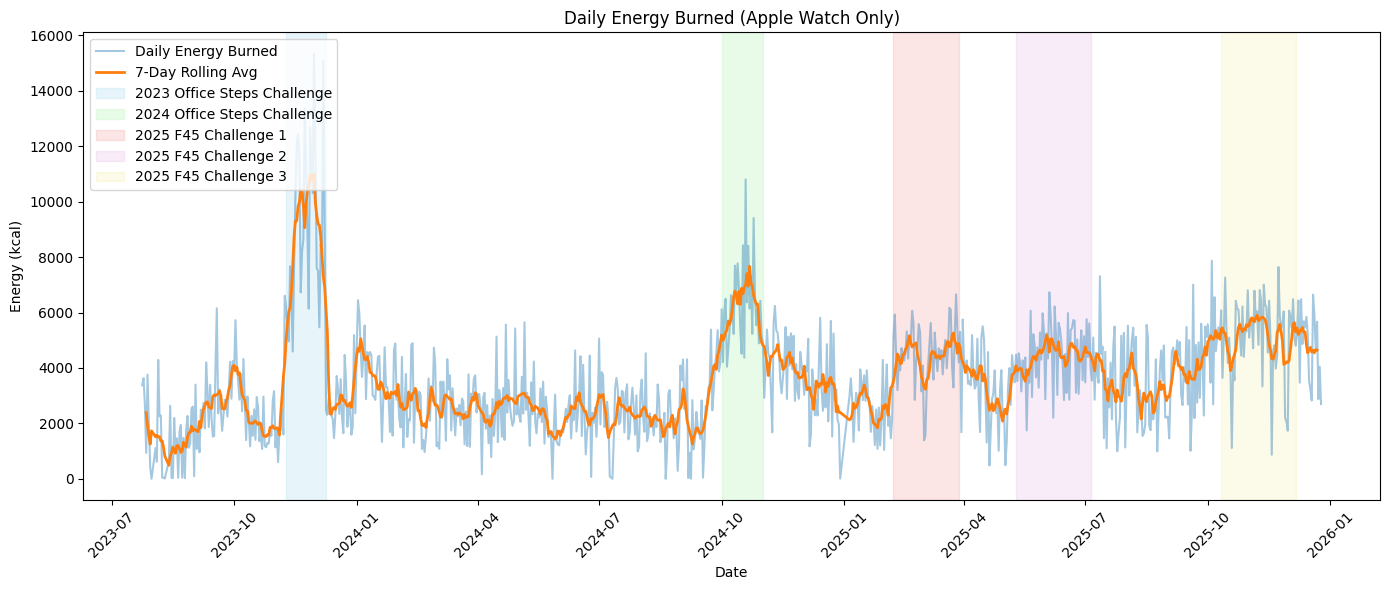

In [21]:
import matplotlib.pyplot as plt

# === Create DataFrame ===
df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifieractiveenergyburned.csv')
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['date'] = df_steps['startDate'].dt.date
daily_steps = df_steps.groupby('date')['value'].sum().reset_index()

# === Rolling Average ===
daily_steps['rolling_avg'] = daily_steps['value'].rolling(window=7, center=True).mean()

# === Plot ===
plt.figure(figsize=(14,6))
plt.plot(daily_steps['date'], daily_steps['value'], label='Daily Energy Burned', alpha=0.4)
plt.plot(daily_steps['date'], daily_steps['rolling_avg'], label='7-Day Rolling Avg', linewidth=2)

# === Highlight Date Ranges ===
highlight_ranges = [
    ("2023-11-09", "2023-12-09", "2023 Office Steps Challenge", "skyblue"),
    ("2024-10-01", "2024-11-01", "2024 Office Steps Challenge", "lightgreen"),
    ("2025-02-07", "2025-03-28", "2025 F45 Challenge 1", "lightcoral"),
    ("2025-05-10", "2025-07-05", "2025 F45 Challenge 2", "plum"),
    ("2025-10-11", "2025-12-06", "2025 F45 Challenge 3", "khaki")
]

for start_str, end_str, label, colour in highlight_ranges:
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)
    plt.axvspan(start, end, color=colour, alpha=0.2, label=label)

# === Final Plot Settings ===
plt.title('Daily Energy Burned (Apple Watch Only)')
plt.xlabel('Date')
plt.ylabel('Energy (kcal)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

/var/folders/px/_2z1qz3x6cv7xwyzftndxrv00000gn/T/ipykernel_88630/146830940.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifierheartrate.csv')


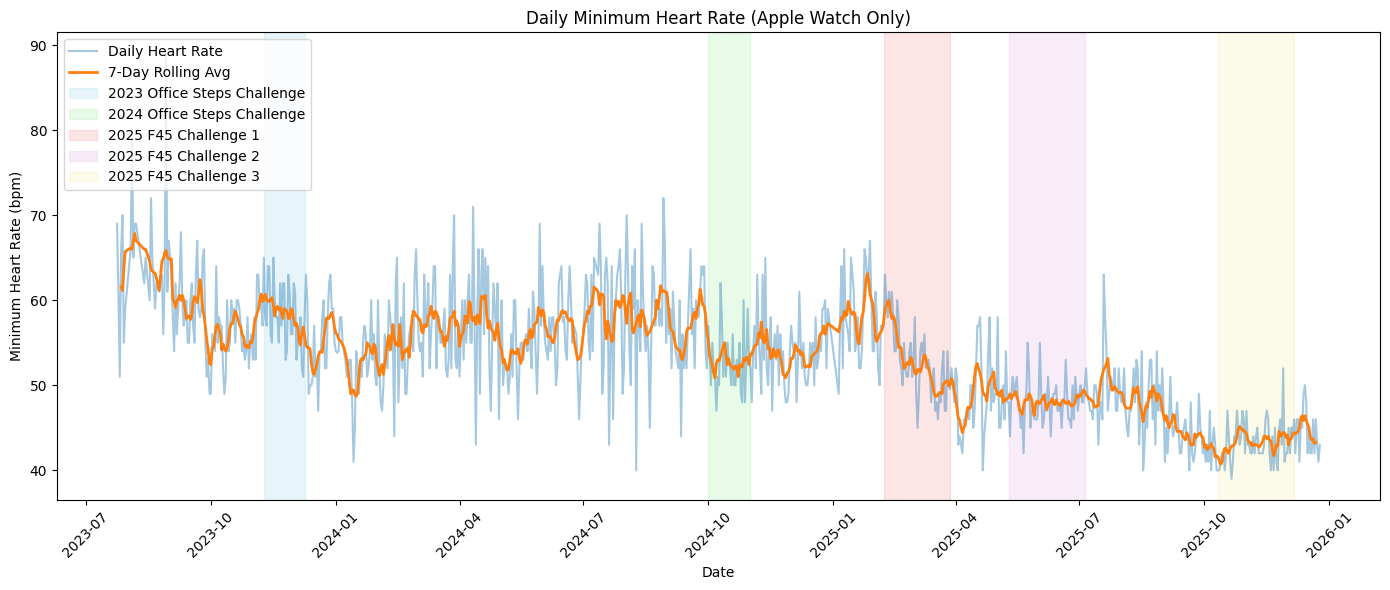

In [27]:
import matplotlib.pyplot as plt

# === Create DataFrame ===
df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifierheartrate.csv')
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['date'] = df_steps['startDate'].dt.date
daily_steps = df_steps.groupby('date')['value'].min().reset_index()

# === Rolling Average ===
daily_steps['rolling_avg'] = daily_steps['value'].rolling(window=7, center=True).mean()

# === Plot ===
plt.figure(figsize=(14,6))
plt.plot(daily_steps['date'], daily_steps['value'], label='Daily Heart Rate', alpha=0.4)
plt.plot(daily_steps['date'], daily_steps['rolling_avg'], label='7-Day Rolling Avg', linewidth=2)

# === Highlight Date Ranges ===
highlight_ranges = [
    ("2023-11-09", "2023-12-09", "2023 Office Steps Challenge", "skyblue"),
    ("2024-10-01", "2024-11-01", "2024 Office Steps Challenge", "lightgreen"),
    ("2025-02-07", "2025-03-28", "2025 F45 Challenge 1", "lightcoral"),
    ("2025-05-10", "2025-07-05", "2025 F45 Challenge 2", "plum"),
    ("2025-10-11", "2025-12-06", "2025 F45 Challenge 3", "khaki")
]

for start_str, end_str, label, colour in highlight_ranges:
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)
    plt.axvspan(start, end, color=colour, alpha=0.2, label=label)

# === Final Plot Settings ===
plt.title('Daily Minimum Heart Rate (Apple Watch Only)')
plt.xlabel('Date')
plt.ylabel('Minimum Heart Rate (bpm)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

/var/folders/px/_2z1qz3x6cv7xwyzftndxrv00000gn/T/ipykernel_88630/3437846009.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifierheartrate.csv')


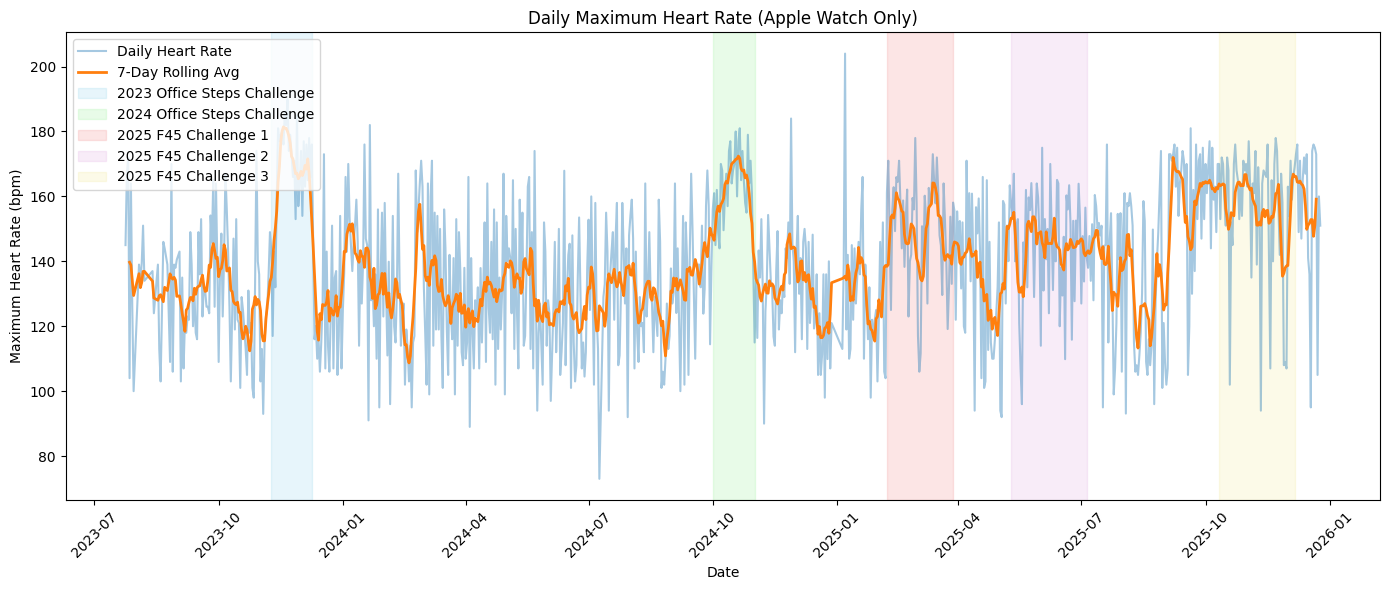

In [28]:
import matplotlib.pyplot as plt

# === Create DataFrame ===
df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifierheartrate.csv')
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['date'] = df_steps['startDate'].dt.date
daily_steps = df_steps.groupby('date')['value'].max().reset_index()

# === Rolling Average ===
daily_steps['rolling_avg'] = daily_steps['value'].rolling(window=7, center=True).mean()

# === Plot ===
plt.figure(figsize=(14,6))
plt.plot(daily_steps['date'], daily_steps['value'], label='Daily Heart Rate', alpha=0.4)
plt.plot(daily_steps['date'], daily_steps['rolling_avg'], label='7-Day Rolling Avg', linewidth=2)

# === Highlight Date Ranges ===
highlight_ranges = [
    ("2023-11-09", "2023-12-09", "2023 Office Steps Challenge", "skyblue"),
    ("2024-10-01", "2024-11-01", "2024 Office Steps Challenge", "lightgreen"),
    ("2025-02-07", "2025-03-28", "2025 F45 Challenge 1", "lightcoral"),
    ("2025-05-10", "2025-07-05", "2025 F45 Challenge 2", "plum"),
    ("2025-10-11", "2025-12-06", "2025 F45 Challenge 3", "khaki")
]

for start_str, end_str, label, colour in highlight_ranges:
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)
    plt.axvspan(start, end, color=colour, alpha=0.2, label=label)

# === Final Plot Settings ===
plt.title('Daily Maximum Heart Rate (Apple Watch Only)')
plt.xlabel('Date')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

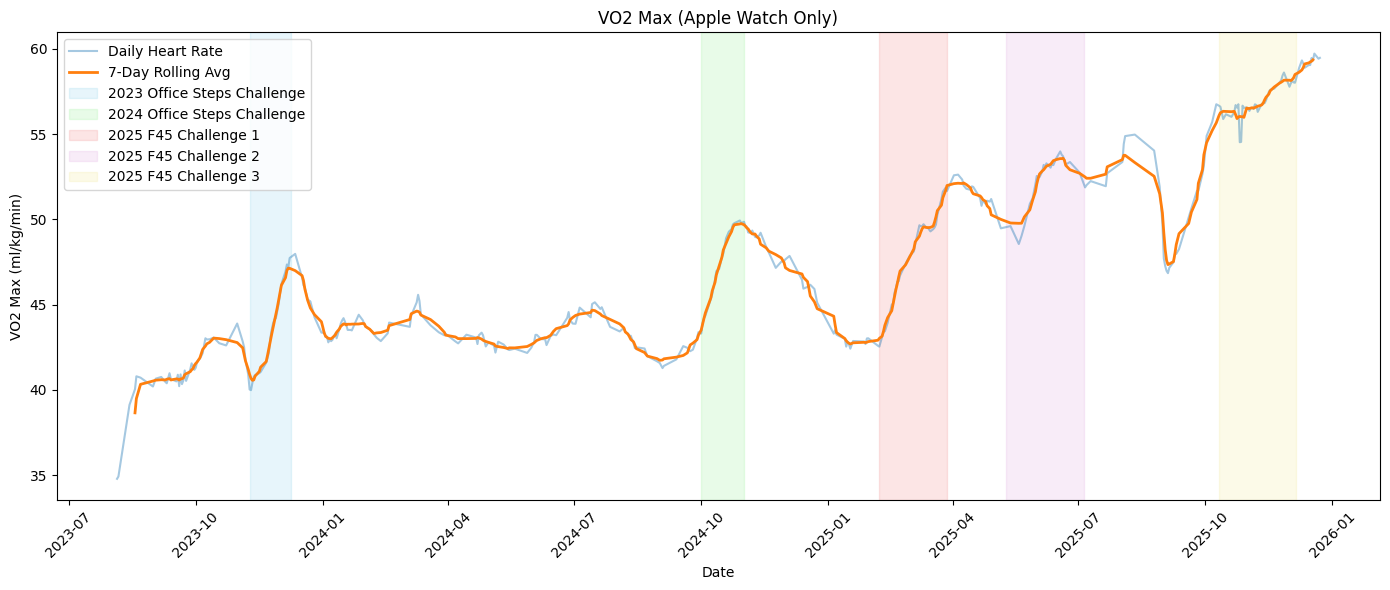

In [30]:
import matplotlib.pyplot as plt

# === Create DataFrame ===
df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifiervo2max.csv')
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['date'] = df_steps['startDate'].dt.date
daily_steps = df_steps.groupby('date')['value'].mean().reset_index()

# === Rolling Average ===
daily_steps['rolling_avg'] = daily_steps['value'].rolling(window=7, center=True).mean()

# === Plot ===
plt.figure(figsize=(14,6))
plt.plot(daily_steps['date'], daily_steps['value'], label='Daily Heart Rate', alpha=0.4)
plt.plot(daily_steps['date'], daily_steps['rolling_avg'], label='7-Day Rolling Avg', linewidth=2)

# === Highlight Date Ranges ===
highlight_ranges = [
    ("2023-11-09", "2023-12-09", "2023 Office Steps Challenge", "skyblue"),
    ("2024-10-01", "2024-11-01", "2024 Office Steps Challenge", "lightgreen"),
    ("2025-02-07", "2025-03-28", "2025 F45 Challenge 1", "lightcoral"),
    ("2025-05-10", "2025-07-05", "2025 F45 Challenge 2", "plum"),
    ("2025-10-11", "2025-12-06", "2025 F45 Challenge 3", "khaki")
]

for start_str, end_str, label, colour in highlight_ranges:
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)
    plt.axvspan(start, end, color=colour, alpha=0.2, label=label)

# === Final Plot Settings ===
plt.title('VO2 Max (Apple Watch Only)')
plt.xlabel('Date')
plt.ylabel('VO2 Max (ml/kg/min)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

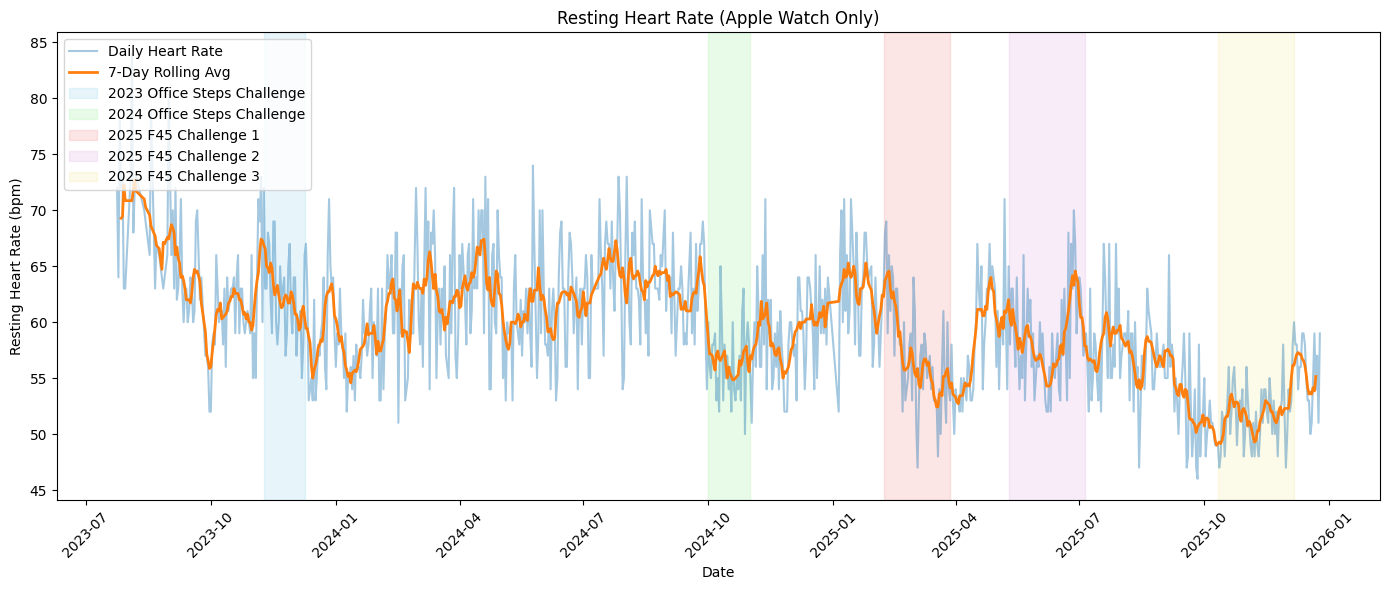

In [31]:
import matplotlib.pyplot as plt

# === Create DataFrame ===
df_steps = pd.read_csv('/Users/joshuawb/Downloads/apple_health_export/apple_watch_hkquantitytypeidentifierrestingheartrate.csv')
df_steps['startDate'] = pd.to_datetime(df_steps['startDate'])
df_steps['date'] = df_steps['startDate'].dt.date
daily_steps = df_steps.groupby('date')['value'].mean().reset_index()

# === Rolling Average ===
daily_steps['rolling_avg'] = daily_steps['value'].rolling(window=7, center=True).mean()

# === Plot ===
plt.figure(figsize=(14,6))
plt.plot(daily_steps['date'], daily_steps['value'], label='Daily Heart Rate', alpha=0.4)
plt.plot(daily_steps['date'], daily_steps['rolling_avg'], label='7-Day Rolling Avg', linewidth=2)

# === Highlight Date Ranges ===
highlight_ranges = [
    ("2023-11-09", "2023-12-09", "2023 Office Steps Challenge", "skyblue"),
    ("2024-10-01", "2024-11-01", "2024 Office Steps Challenge", "lightgreen"),
    ("2025-02-07", "2025-03-28", "2025 F45 Challenge 1", "lightcoral"),
    ("2025-05-10", "2025-07-05", "2025 F45 Challenge 2", "plum"),
    ("2025-10-11", "2025-12-06", "2025 F45 Challenge 3", "khaki")
]

for start_str, end_str, label, colour in highlight_ranges:
    start = pd.to_datetime(start_str)
    end = pd.to_datetime(end_str)
    plt.axvspan(start, end, color=colour, alpha=0.2, label=label)

# === Final Plot Settings ===
plt.title('Resting Heart Rate (Apple Watch Only)')
plt.xlabel('Date')
plt.ylabel('Resting Heart Rate (bpm)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()